# Задание 3. Python
## Задачи

1. Реализуйте функцию, которая будет автоматически подгружать информацию из дополнительного файла groups_add.csv (заголовки могут отличаться) и на основании дополнительных параметров пересчитывать метрики.
2. Реализуйте функцию, которая будет строить графики по получаемым метрикам.

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pingouin as pg
from scipy.stats import bootstrap
from scipy.stats import norm
from scipy import stats
from scipy.stats import mannwhitneyu

import scipy.stats as ss

%matplotlib inline 

In [91]:
def get_update(File_path):
    
# Загружаем новый файл и сохраняем его в df  
    groups_add = pd.read_csv(file_path)
# Подгружаем старые файлы
    groups = pd.read_csv('groups.csv', sep=';')
    active_studs = pd.read_csv('active_studs.csv', sep=';')
    checks = pd.read_csv('checks.csv', sep=';')
# Соединяй с обновлением
    all_groups = pd.concat([groups, groups_add])
# Считаем количество пользователей в группе A и группе B.
    all_users_a = all_groups.query("grp == 'A'").grp.count()
    all_users_b = all_groups.query("grp == 'B'").grp.count()
# Переименуем столбец student_id для последующего мержа
    checks = checks.rename(columns = {'student_id':'id'})
    active_studs = active_studs.rename(columns = {'student_id':'id'})
# Отберем пользователей и активных и оплативших, исключив тех, кто оплатил но не был активен(не заходил)
    paid = checks.query("rev != 0")
# Начнем мержить датафреймы 
    paid_and_active = active_studs.merge(paid, how = 'left', on = 'id')
# Смержим активных и оплативших paid_and_active и всех пользователей разбитых на группы all_groups
    active_all = all_groups.merge(paid_and_active, how='right', on='id')
    active_all['rev'] = active_all.rev.fillna(0)
    active_paid_not_zero = active_all.query("rev > 0")
# Вся группа А, где есть оплаты и нет
    a = active_all.query("grp == 'A'")
# Вся группа B, где есть оплаты и нет
    b = active_all.query("grp == 'B'")
# Группа А, которые оплатили
    a_was_paid = a.query("rev > 0")
# Группа B, которые оплатили
    b_was_paid = b.query("rev > 0")
# Посчитаем конверсию
    CR_a = a_was_paid.shape[0]/a.shape[0]
    CR_b = b_was_paid.shape[0]/b.shape[0]
# Посчитаем ARPPU
    ARPPU_a = a_was_paid.rev.sum()/a_was_paid.shape[0]
    ARPPU_b = b_was_paid.rev.sum()/b_was_paid.shape[0]
# Посчитаем ARPU
    ARPU_a = a_was_paid.rev.sum()/a.shape[0]
    ARPU_b = b_was_paid.rev.sum()/b.shape[0]
# Создание графиков
    labels = ['Group A', 'Group B']
    conversion_rates = [CR_a, CR_b]
    arppu_values = [ARPPU_a, ARPPU_b]
    arpu_values = [ARPU_a, ARPU_b]
# График для конверсии (CR)
    plt.figure(figsize=(10, 5))
    plt.bar(labels, conversion_rates, color=['blue', 'green'])
    plt.title('Conversion Rate (CR) for Group A and Group B')
    plt.ylabel('Conversion Rate')
    plt.show()
    
# График для ARPPU
    plt.figure(figsize=(10, 5))
    plt.bar(labels, arppu_values, color=['blue', 'green'])
    plt.title('Average Revenue Per Paying User (ARPPU) for Group A and Group B')
    plt.ylabel('ARPPU')
    plt.show()
    
# График для ARPU
    plt.figure(figsize=(10, 5))
    plt.bar(labels, arpu_values, color=['blue', 'green'])
    plt.title('Average Revenue Per User (ARPU) for Group A and Group B')
    plt.ylabel('ARPU')
    plt.show()
# График для активных и покупающих пользователей
    active_users_a = a.shape[0]
    active_paid_users_a = a_was_paid.shape[0]
    active_users_b = b.shape[0]
    active_paid_users_b = b_was_paid.shape[0]

    active_labels = ['Group A', 'Group B']
    active_values = [active_users_a, active_users_b]
    active_paid_values = [active_paid_users_a, active_paid_users_b]

    plt.figure(figsize=(10, 5))
    plt.bar(active_labels, active_values, color='blue', label='Active Users')
    plt.bar(active_labels, active_paid_values, color='green', label='Active and Paid Users', alpha=0.7)
    plt.title('Active and Active-Paid Users for Group A and Group B')
    plt.ylabel('Number of Users')
    plt.legend()
    plt.show()
    
# Возврат результатов и графиков
    return (CR_a, CR_b, ARPPU_a, ARPPU_b, ARPU_a, ARPU_b)


In [92]:
file_path = 'groups_add.csv'

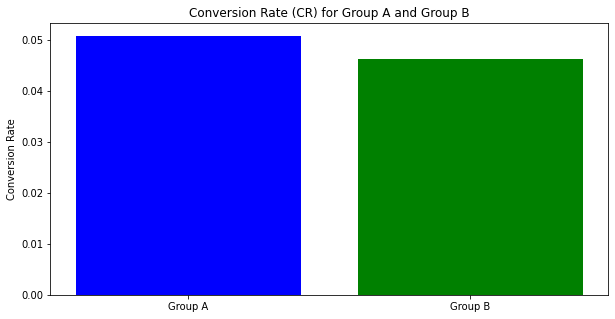

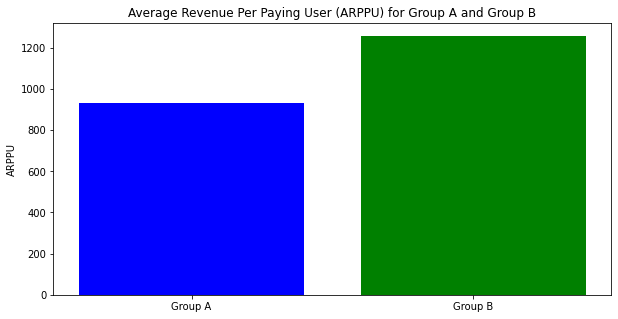

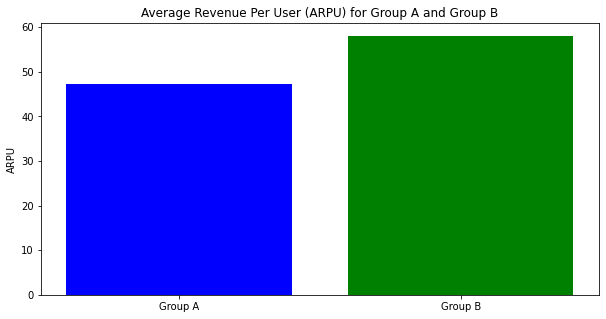

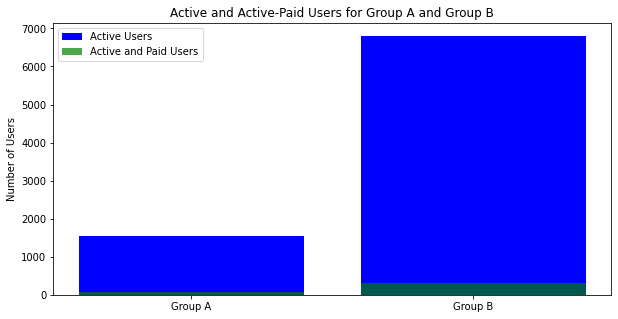

(0.05071521456436931,
 0.046156107599588415,
 933.5897435897435,
 1257.8789920382164,
 47.34720416124838,
 58.05879810377775)

In [93]:
get_update(file_path)